# 2020.1~2020.6 card데이터 분석

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# 데이터 불러오기
fpopl = pd.read_csv('fpopl.csv') # 행정동별 유동인구
adstrd = pd.read_csv('adstrd_master.csv') # 8자리 행정동 코드 
card = pd.read_csv('card_20200717.csv') # 업종별 결제금액

## 1.데이터 설명

행정동별 유동인구 데이터
- 시기: 2020-01-01 ~ 2020-06-16
- base_ymd : 기준연월일
- tmzon_se_code : 24시간대 구분코드
- sexdstn_se_code : 성별 구분코드 (M:남성, F:여성)
- argde_se_code : 5세단위 연령대 구분코드
- astrd_code : 행정동코드
- popltn_cascnt : 유동인구 수

카드 데이터의 일자별 전체 데이터
- 시기: 2020-01-04 ~ 2020-06-14
- receipt_dttm : 기준연월일
- adstrd_code : 가맹점 위치 기준 행정동 코드 -> 모두 11로 시작하고, 서울시 데이터
- adstrd_nm : 가맹점 위치 기준 행정동명
- mrhst_induty_cl_code : 가맹점 업종 코드
- mrhst_induty_cl_nm : 가맹점 업종명 -> 전체 260개
- selng_cascnt : 매출발생건수
- salamt : 매출발생금액

8자리 행정동 코드
- adstrd_cord : 행정동 코드
- adstrd_nm : 행정동명
- brtc_nm : 시도명
- signgu_nm : 시군구명


In [3]:
card

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3713947,20200614,1121586000,구의2동,4004,대형할인점,136,1195640
3713948,20200614,1121584700,자양4동,9010,인테 리어,2,13100
3713949,20200614,1162052500,보라매동,6140,주 차 장,2,14500
3713950,20200614,1135056000,월계1동,9998,기타전문점,1,38000


In [4]:
adstrd

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580.0,서홍동,제주특별자치도,서귀포시
3489,50130590.0,대륜동,제주특별자치도,서귀포시
3490,50130600.0,대천동,제주특별자치도,서귀포시
3491,50130610.0,중문동,제주특별자치도,서귀포시


In [5]:
fpopl

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6
...,...,...,...,...,...,...
47546438,20200616,23,F,age_70,11500593,38
47546439,20200616,23,M,age_70,11350624,28
47546440,20200616,23,M,age_70,11305534,47
47546441,20200616,23,F,age_70,11500604,50


## 2. 데이터 탐색 및 전처리 

병합처리를 하기 위해 card 데이터의 receipt_dttm와 같은 형태로 변경해 줍니다.

In [5]:
card.receipt_dttm = pd.to_datetime(card.receipt_dttm, format="%Y%m%d")
fpopl.base_ymd = pd.to_datetime(fpopl.base_ymd, format ="%Y%m%d")

In [7]:
fpopl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47546443 entries, 0 to 47546442
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   base_ymd         datetime64[ns]
 1   tmzon_se_code    int64         
 2   sexdstn_se_code  object        
 3   agrde_se_code    object        
 4   adstrd_code      int64         
 5   popltn_cascnt    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.1+ GB


In [8]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713952 entries, 0 to 3713951
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   receipt_dttm          datetime64[ns]
 1   adstrd_code           int64         
 2   adstrd_nm             object        
 3   mrhst_induty_cl_code  int64         
 4   mrhst_induty_cl_nm    object        
 5   selng_cascnt          int64         
 6   salamt                int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 198.3+ MB


병합하기 위해 기준이 되는 receipt_dttm의 컬럼이름을 "일시"로 변경해 줍니다.
fpopl또한 base_ymd를 "일시"로 변경해 줍니다.

In [6]:
card =  card.rename(columns = {"receipt_dttm" :"일시" })
fpopl = fpopl. rename(columns = {"base_ymd": "일시"})

각각의 데이터에 결측치값이 있는지 확인해 줍니다.

In [10]:
print(card.isna().sum().sum(), fpopl.isna().sum().sum(),adstrd.isna().sum().sum())

0 0 19


adstrd데이터에 있는 결측치값이 세종시에 있는걸 확인할 수 있습니다.
그러나 이번분석에서는 서울시에 대한 분석만 할것이기 때문에 세종시에 대한 결측치값은 무시해 줍니다.

In [349]:
adstrd[adstrd.signgu_nm.isna()].style.highlight_null('yellow')

,adstrd_code,brtc_nm,signgu_nm
1153,36110250,세종특별자치시,nan
1154,36110310,세종특별자치시,nan
1155,36110320,세종특별자치시,nan
1156,36110330,세종특별자치시,nan
1157,36110340,세종특별자치시,nan
1158,36110350,세종특별자치시,nan
1159,36110360,세종특별자치시,nan
1160,36110370,세종특별자치시,nan
1161,36110380,세종특별자치시,nan
1162,36110390,세종특별자치시,nan


merge()를 활용하여 card 데이터와 weather데이터를 합쳐 줍니다.

card데이터의 adstrd_code데이터가 실질적 자치구별 행정동 코드이지만, adstrd데이터의 adstrd_code로도 행정동이 구별되기때문에 같은 기준으로 변경해줍니다.


In [7]:
adstrd = adstrd.drop("adstrd_nm", axis = 1)

In [8]:
card.adstrd_code = (card.adstrd_code/100).astype("int64")
adstrd.adstrd_code = adstrd.adstrd_code.astype("int64")

fpopl의 일별, 행정동별 유동인구수를 구해 card2의 데이터와 병합쳐리 해줍니다.

In [9]:
fp_ad = pd.merge(fpopl, adstrd)

In [10]:
card3 = pd.merge(card, pd.DataFrame(fp_ad.groupby(["일시", "signgu_nm"])["popltn_cascnt"].sum()).reset_index())
card3

,일시,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,signgu_nm,popltn_cascnt
0,2020-01-04,11740660,성내3동,7041,약국,463,5843230,강남구,4268654
1,2020-01-04,11740660,성내3동,7041,약국,463,5843230,강동구,2425402
2,2020-01-04,11740660,성내3동,7041,약국,463,5843230,강북구,1036862
3,2020-01-04,11740660,성내3동,7041,약국,463,5843230,강서구,2465692
4,2020-01-04,11740660,성내3동,7041,약국,463,5843230,관악구,1977717
...,...,...,...,...,...,...,...,...,...
92848795,2020-06-14,11590605,흑석동,9204,사무통신기기수리,1,20000,용산구,1848525
92848796,2020-06-14,11590605,흑석동,9204,사무통신기기수리,1,20000,은평구,1436435
92848797,2020-06-14,11590605,흑석동,9204,사무통신기기수리,1,20000,종로구,1269669
92848798,2020-06-14,11590605,흑석동,9204,사무통신기기수리,1,20000,중구,1166980


행정동별 유동인구에서 자치구별 유동인구를 구해줍니다.  

In [19]:
card4 = card3.drop(["adstrd_code","adstrd_nm"], axis = 1)
card4.head()

,일시,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,signgu_nm,popltn_cascnt
0,2020-01-04,7041,약국,463,5843230,강남구,4268654
1,2020-01-04,7041,약국,463,5843230,강동구,2425402
2,2020-01-04,7041,약국,463,5843230,강북구,1036862
3,2020-01-04,7041,약국,463,5843230,강서구,2465692
4,2020-01-04,7041,약국,463,5843230,관악구,1977717


비슷한 유형의 가맹점들을 묶어 줍니다.

In [20]:
card4.mrhst_induty_cl_code = card4.mrhst_induty_cl_code // 1000

DataFrame을 보기 쉽게 하기 위해 컬럼이름을 변경해 줍니다.

In [26]:
columns = {"mrhst_induty_cl_code" : "업종코드",
          "mrhst_induty_cl_nm" :"업종명",
          "selng_cascnt" : "매출발생건수",
          "salamt" : "매출발생금액",
          "signgu_nm" :"자치구",
          "popltn_cascnt": "유동인구수"}
card5 = card4.rename(columns= columns)
card5['요일'] = card5.일시.dt.day_name()

In [61]:
card5.describe().T

,count,mean,std,min,25%,50%,75%,max
업종코드,3713952.0,5.908007e+00,2.364232e+00,1.000000e+00,4.0,7.0,8.0,9.000000e+00
매출발생건수,3713952.0,2.130553e+02,9.099785e+03,-1.892000e+03,2.0,9.0,47.0,5.729589e+06
매출발생금액,3713952.0,8.661771e+06,5.059716e+08,-2.937331e+09,115000.0,472070.5,1817860.0,5.421737e+11
유동인구수,3713952.0,2.294153e+06,9.875314e+05,6.767520e+05,1644887.0,2017288.0,2630307.0,5.876392e+06


In [62]:
card5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713952 entries, 0 to 3713951
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   일시      datetime64[ns]
 1   업종코드    int64         
 2   업종명     object        
 3   매출발생건수  int64         
 4   매출발생금액  int64         
 5   자치구     object        
 6   유동인구수   int64         
 7   요일      object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 255.0+ MB


데이터세트의 크기를 줄여줄 수 있는 데이터는 크기를 줄여 줍니다. 

In [27]:
card5.업종코드 = card5.업종코드.astype('int16')
card5.매출발생건수 = card5.매출발생건수.astype('int32')
card5.업종명 = card5.업종명.astype('category')
card5.자치구 = card5.자치구.astype('category')
card5.유동인구수 = card5.유동인구수.astype('int32')
card5.요일 = card5.요일.astype('category')

## 2. 분석

### 각 자치구별 업종 10가지의 산업 매출 분석을 통해  산업 매출  시각화로 표현할 것입니다.


In [64]:
card5

,일시,업종코드,업종명,매출발생건수,매출발생금액,자치구,유동인구수,요일
0,2020-01-04,7,약국,463,5843230,강동구,2425402,Saturday
1,2020-01-04,7,치과의원,33,7835550,강동구,2425402,Saturday
2,2020-01-04,7,한의원,53,4589800,강동구,2425402,Saturday
3,2020-01-04,7,의원,339,9267240,강동구,2425402,Saturday
4,2020-01-04,6,자동차정비,19,4441000,강동구,2425402,Saturday
...,...,...,...,...,...,...,...,...
3713947,2020-06-14,4,악세 사리,6,288000,종로구,1269669,Sunday
3713948,2020-06-14,4,편 의 점,316,2000220,종로구,1269669,Sunday
3713949,2020-06-14,3,기타가구,5,124000,종로구,1269669,Sunday
3713950,2020-06-14,7,안마/스포츠마사지,2,120000,종로구,1269669,Sunday


각각의 업종코드에 어떠한업종이 들어가 있는지 살펴보면 숙박, 레져,가구, 판매점 물품, 교육, 자동차 정비, 병원, 음식점, 기타 등등.. 다양한 업종이 있는걸 살펴 볼수 있습니다.

In [65]:
card5[card5['업종코드']==1].업종명.unique()
# 유형 1 : 숙박 및 교통수단

['기타숙박업', '렌 트 카', '관광여행', '택   시', '기타교통수단', ..., '철   도', '항 공 사', '고속 버스', '여 객 선', '택시회사']
Length: 14
Categories (14, object): ['기타숙박업', '렌 트 카', '관광여행', '택   시', ..., '항 공 사', '고속 버스', '여 객 선', '택시회사']

In [36]:
card5[card5['업종코드']==2].업종명.unique()
# 유형 2 : 레져

['기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품', ..., '스 키 장', '총포류판매', '골프경기장', '카지노', '골동품 점']
Length: 28
Categories (28, object): ['기타레져업', '노래방', '당구장', '헬스 크럽', ..., '총포류판매', '골프경기장', '카지노', '골동품 점']

In [37]:
card5[card5['업종코드']==3].업종명.unique()
# 유형 3 : 가구 및 연료

['사진관', '일반 가구', '주 유 소', '가전 제품', '기타전기제품', ..., '정 수 기', '전기차충전소', '기타주방용구', '기타광학품', '기타연료']
Length: 18
Categories (18, object): ['사진관', '일반 가구', '주 유 소', '가전 제품', ..., '전기차충전소', '기타주방용구', '기타광학품', '기타연료']

In [38]:
card5[card5['업종코드']==4].업종명.unique()
# 유형 4 : 판매점 물품

['정장', '슈퍼 마켓', '편 의 점', '악세 사리', '기타잡화', ..., '통신판매1', '전자상거래 상품권', '캐쥬얼의류', '양 품 점', '기타비영리유통']
Length: 46
Categories (46, object): ['정장', '슈퍼 마켓', '편 의 점', '악세 사리', ..., '전자상거래 상품권', '캐쥬얼의류', '양 품 점', '기타비영리유통']

In [39]:
card5[card5['업종코드']==5].업종명.unique()
# 유형 5 : 교육 및 서적

['기타 교육', '보습학원', '일반 서적', '예체능학원', '문구용 품', ..., '대학등록금', '유학원', '전자(상우회)', '교육테이프', '통신기기무이자할부']
Length: 28
Categories (28, object): ['기타 교육', '보습학원', '일반 서적', '예체능학원', ..., '유학원', '전자(상우회)', '교육테이프', '통신기기무이자할부']

In [40]:
card5[card5['업종코드']==6].업종명.unique()
# 유형 6 : 자동차정비 및 부품

['자동차정비', '주 차 장', '세 차 장', '자동차부품', '이륜차판매', ..., '기타자동차서비스', '생명 보험', '국산 신차', '기타 운송', '중고자동차위탁판매']
Length: 20
Categories (20, object): ['자동차정비', '주 차 장', '세 차 장', '자동차부품', ..., '생명 보험', '국산 신차', '기타 운송', '중고자동차위탁판매']

In [41]:
card5[card5['업종코드']==7].업종명.unique()
# 유형 7 : 병원

['약국', '치과의원', '한의원', '의원', '화 장 품', ..., '종합병원', '제약회사', '한약방', '건강진단', '조산원']
Length: 25
Categories (25, object): ['약국', '치과의원', '한의원', '의원', ..., '제약회사', '한약방', '건강진단', '조산원']

In [42]:
card5[card5['업종코드']==8].업종명.unique()
# 유형 8 : 음식점

['기타음료식품', '농축수산품', '정 육 점', '제과점', '스넥', ..., '홍삼 제품', '미곡상', '갈비전문점', '인삼 제품', '한정식']
Length: 21
Categories (21, object): ['기타음료식품', '농축수산품', '정 육 점', '제과점', ..., '미곡상', '갈비전문점', '인삼 제품', '한정식']

In [43]:
card5[card5['업종코드']==9].업종명.unique()
# 유형 9 : 기타

['기타건축자재', '기계 공구', '비 영 리', '레져업소(회원제형태)', '세탁소', ..., '비씨카드정산용(할인)', '통신판매(생활서비스)', '위성방송', '외국인전용가맹점', 'P2P송금']
Length: 60
Categories (60, object): ['기타건축자재', '기계 공구', '비 영 리', '레져업소(회원제형태)', ..., '통신판매(생활서비스)', '위성방송', '외국인전용가맹점', 'P2P송금']

In [51]:
업종유형=["숙박 및 교통","레져","가구 및 연료","판매점 물품","교육 및 서적","자동차정비 및 부품","병원","음식점","기타"]

In [49]:
일별_업종_매출 = pd.DataFrame(card5.groupby(['일시', '업종코드'],as_index=False)['매출발생금액'].sum())
일별_업종_매출

,일시,업종코드,매출발생금액
0,2020-01-04,1,4156278743
1,2020-01-04,2,1929884656
2,2020-01-04,3,778612580
3,2020-01-04,4,51377254797
4,2020-01-04,5,3696595882
...,...,...,...
1390,2020-06-14,5,1792669013
1391,2020-06-14,6,3479671279
1392,2020-06-14,7,12919769990
1393,2020-06-14,8,23749286774


날짜별 업종의 매출발생금액을 다 합하여 일별_업종_매출에 저장했습니다.

이것이 날짜변화에 따라 매출발생금액을 시각화로 표현한것입니다.

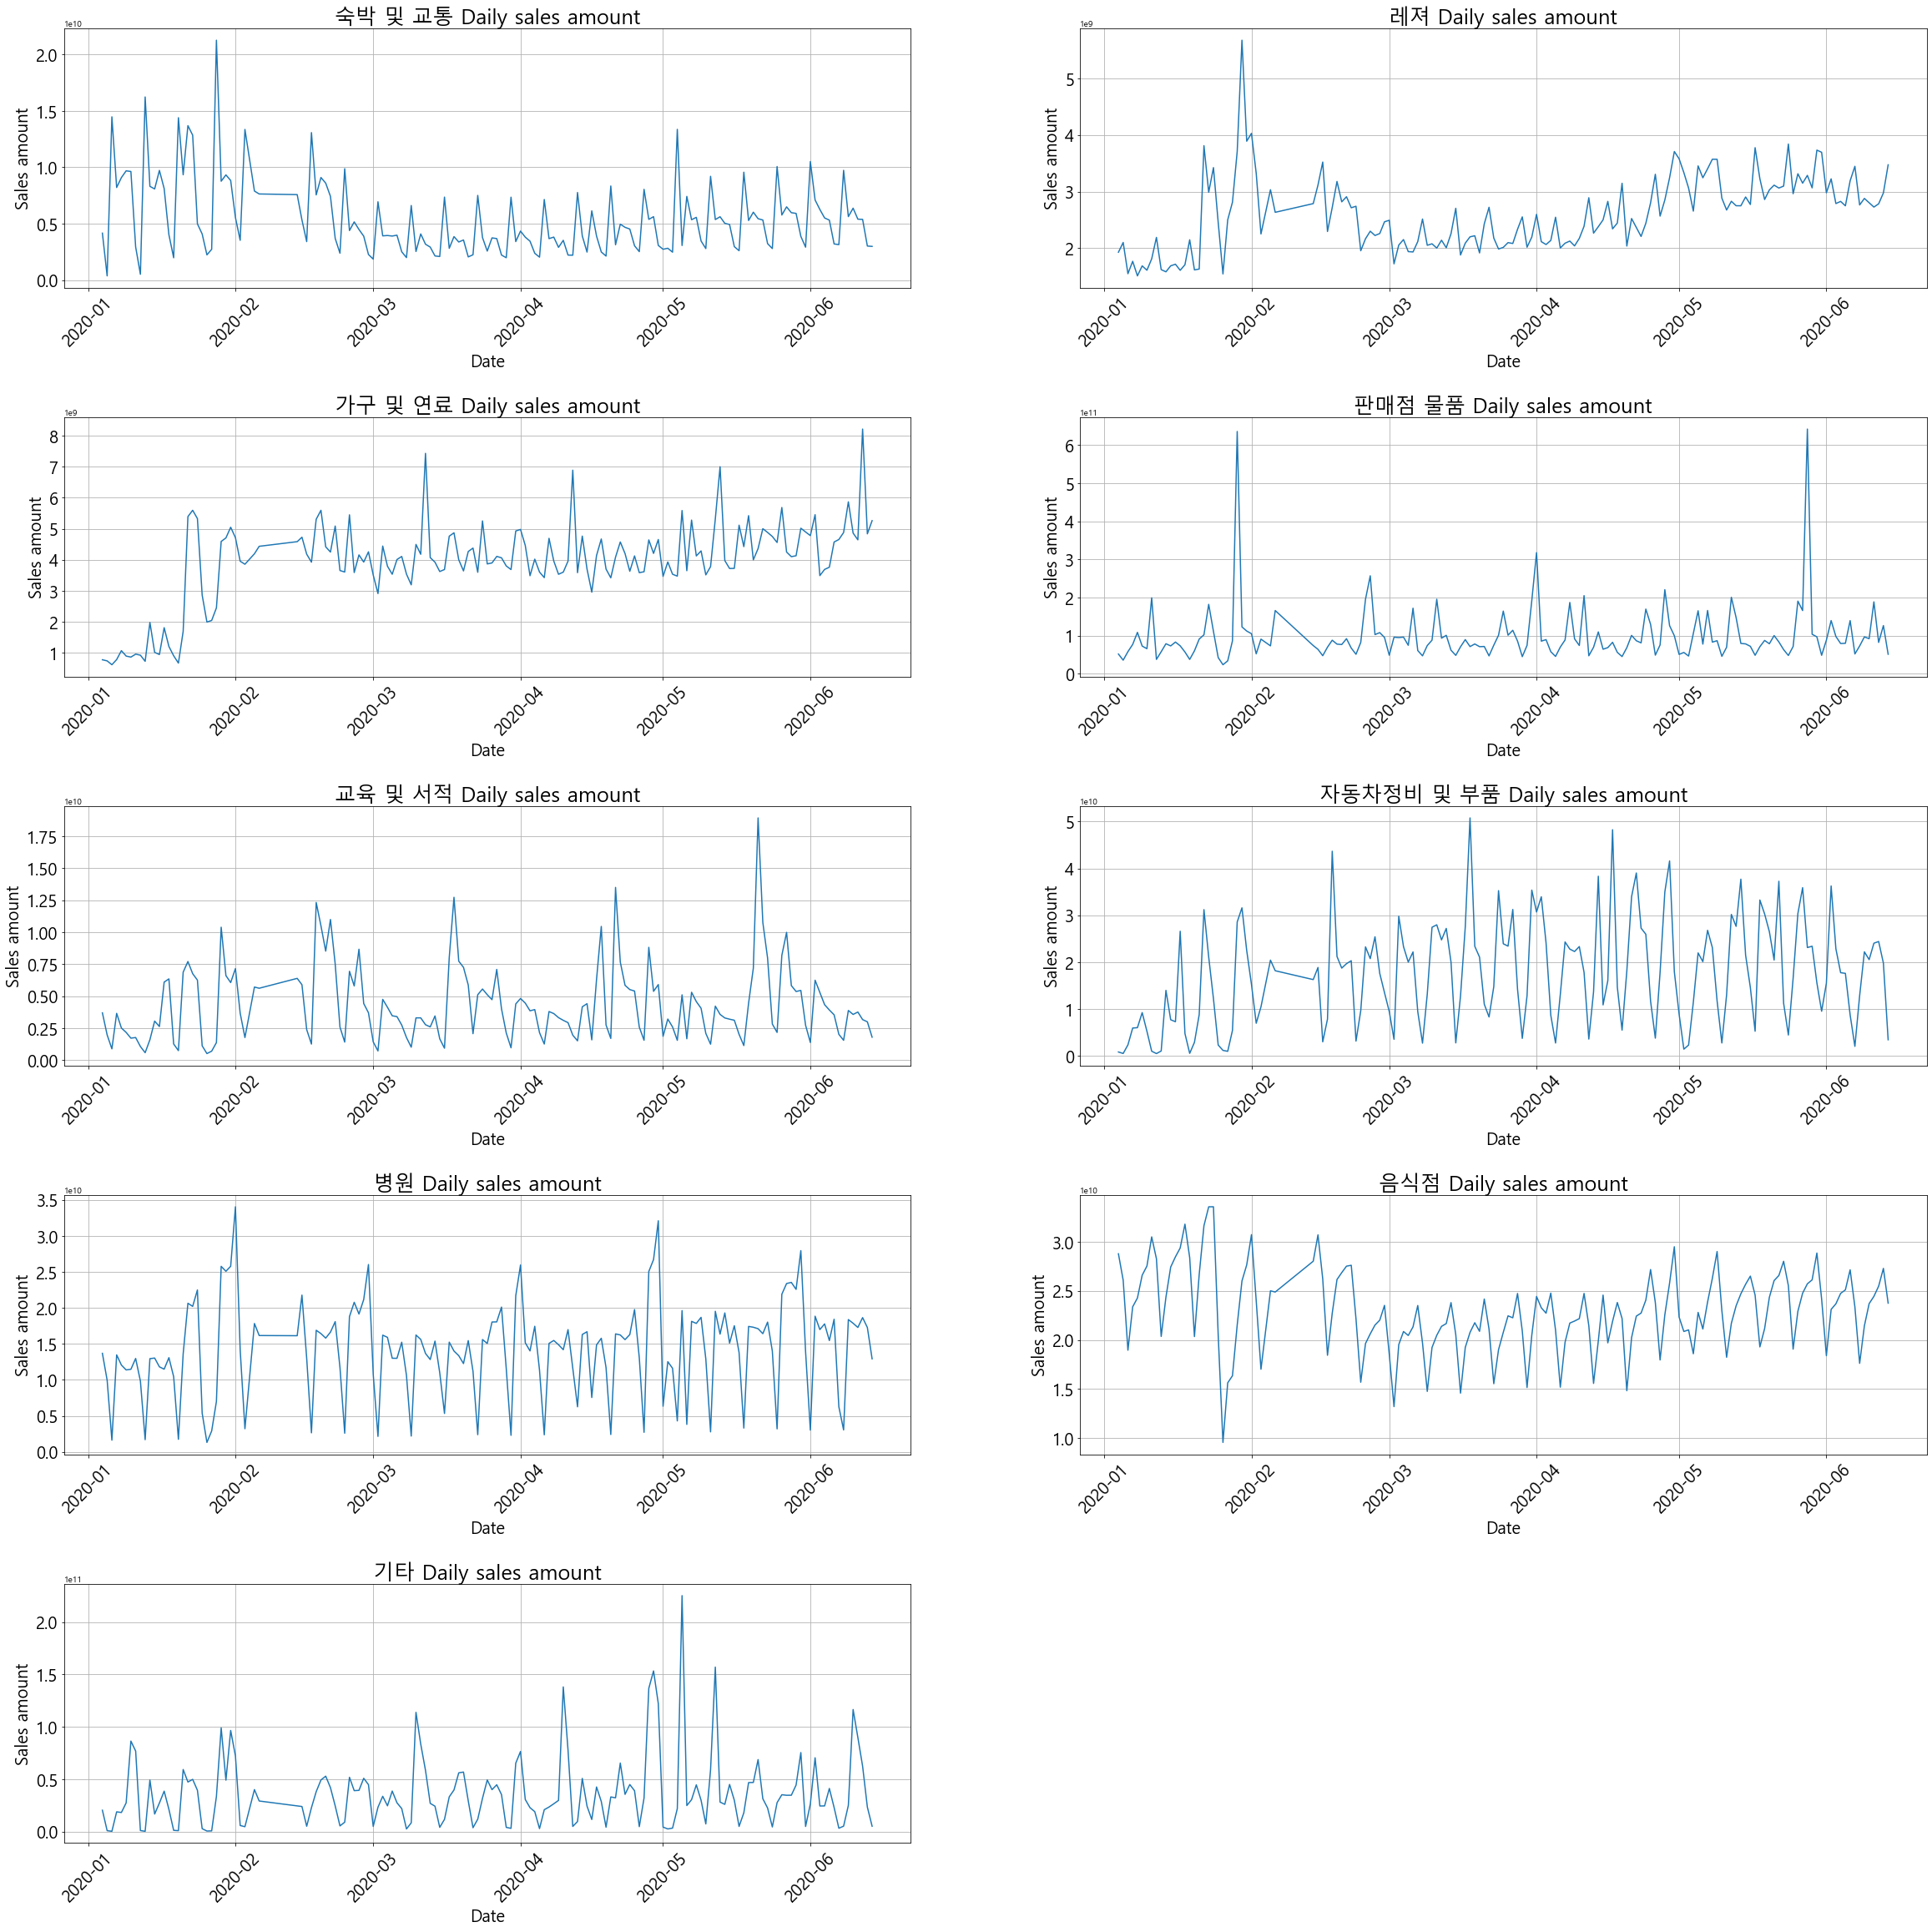

In [151]:
fig = plt.figure(figsize=(40,40))
for i in range(1,10):
    indstry_df = 일별_업종_매출[일별_업종_매출.업종코드 == i]

    x = indstry_df['일시']
    y = indstry_df['매출발생금액']
    ax = fig.add_subplot(5, 2, i)
    fig.subplots_adjust(hspace = .5)
    ax.plot(x, y)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.title(f'{업종유형[i-1]} Daily sales amount', fontsize = 25)
    plt.xlabel('Date', fontsize = 20)
    plt.ylabel('Sales amount', fontsize = 20)
    plt.grid()
    i += 1
plt.show()

가구 및 연료 업종같이 시간이 지남에 따라 매출발생금액이 상승하는 산업도 있고, 1월달에는 매출발생금액이 성장하다가 2월 이후 감소하는 업종도 볼수 있습니다. 음식점 산업의 경우 2월에는 매출이 감소하고, 4월부터 점차 매출이 회복하는걸 알 수 있습니다. 그리고 그래프를 살펴보면 숙박 및 교통 업종같이 많은 산업들이 1주일간격의 매출발생 패턴을 가지고 있습니다. 그리하여 1주일 간격의 매출발생을 시각화 해 보았습니다. 


In [80]:
요일별_업종_매출 = pd.DataFrame(card5.groupby(['요일','업종코드'])['매출발생금액'].mean())
요일별_업종_매출 = 요일별_업종_매출.unstack('업종코드').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).stack().reset_index()

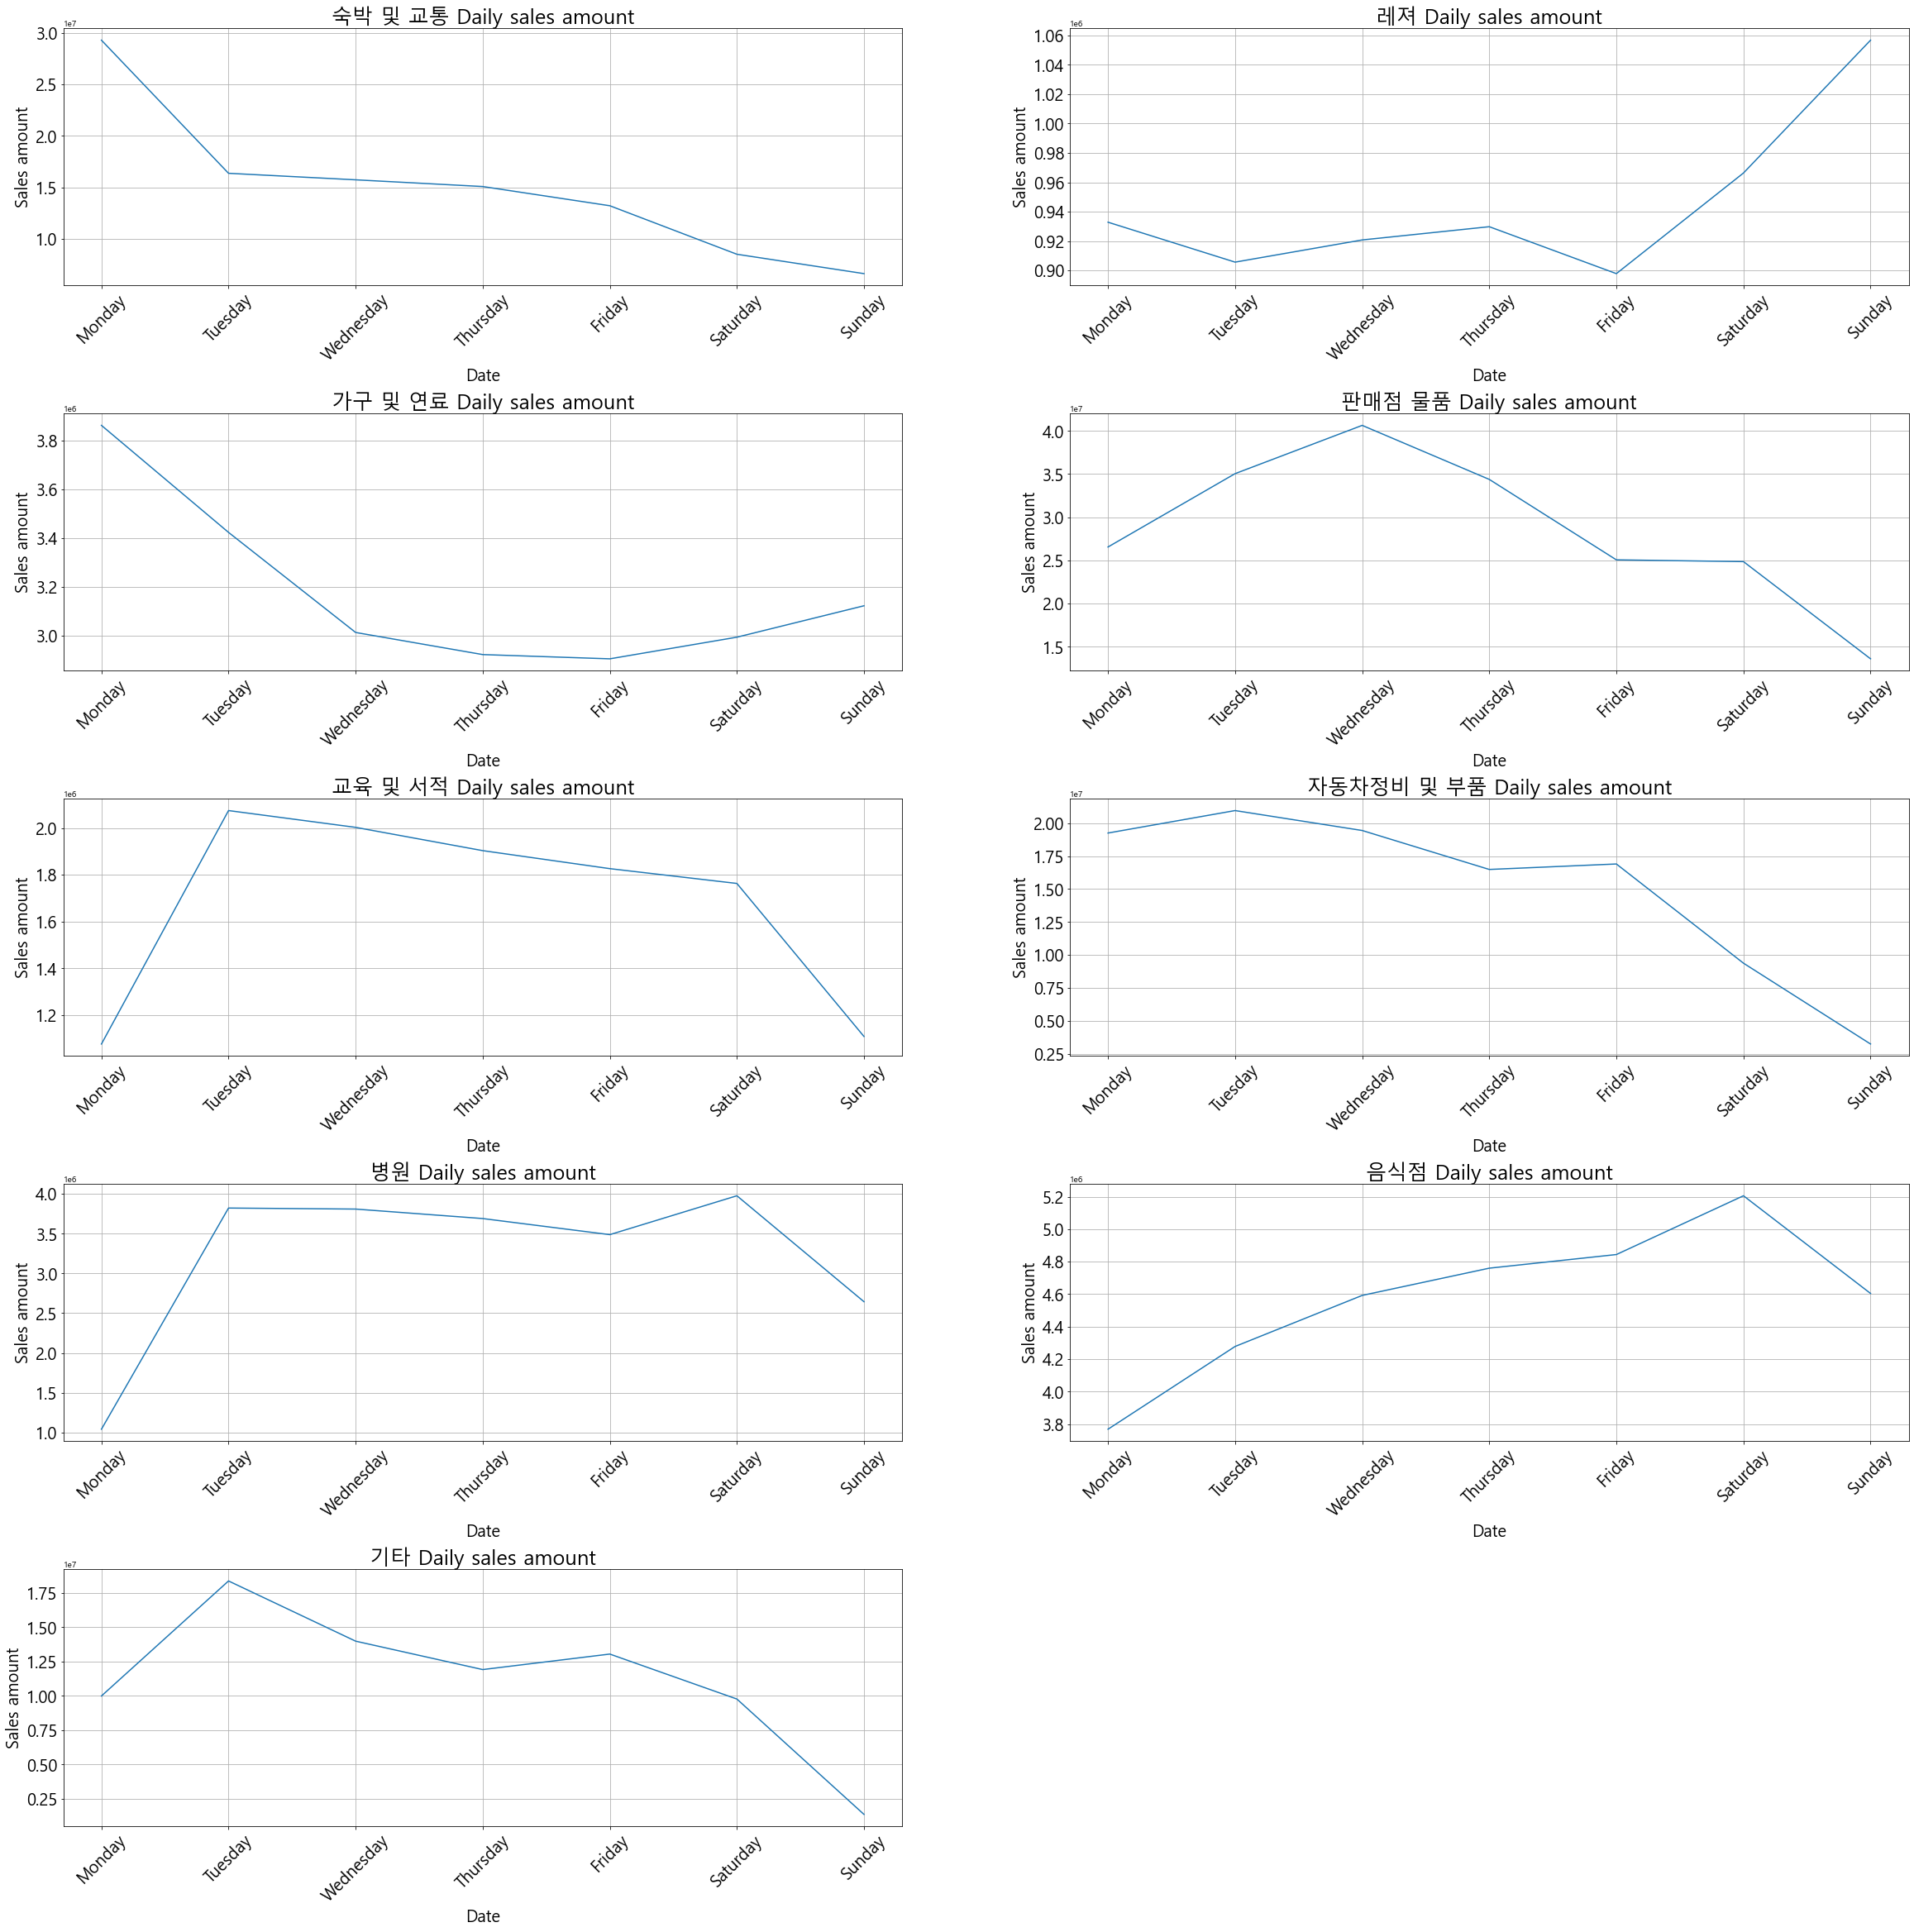

In [79]:
fig = plt.figure(figsize=(40,40))
for i in range(1,10):
    indstry_df = 요일별_업종_매출[요일별_업종_매출.업종코드 == i]

    x = indstry_df['요일']
    y = indstry_df['매출발생금액']
    ax = fig.add_subplot(5, 2, i)
    fig.subplots_adjust(hspace = .5)
    ax.plot(x, y)
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.title(f'{업종유형[i-1]} Daily sales amount', fontsize = 25)
    plt.xlabel('Date', fontsize = 20)
    plt.ylabel('Sales amount', fontsize = 20)
    plt.grid()
    i += 1
plt.show()

일일 매출 패턴을 살펴보면, 다양한 형태의 그래프를 확인할 수 있습니다. 일주일내에 적게는 1.2배(레져산업), 많게는 7배(기타산업) 정도의 일일 매출 차이를 가지고 있는 걸 알 수 있습니다. 음심점이랑 레져산업을 제외하면 주말에 매출이 적게 발생하는걸 알 수 있었습니다. 
숙박및 교통 업종의 경우 평일에서 주말로 갈수로 평균적으로 매출이 작아지고, 판매물품의 경우 수요일에 평균적으로 가장 높은 매출을 기록하는걸 알 수 있습니다. 

#### 업종코드 1 , 숙박및 교통수단

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 10 artists>

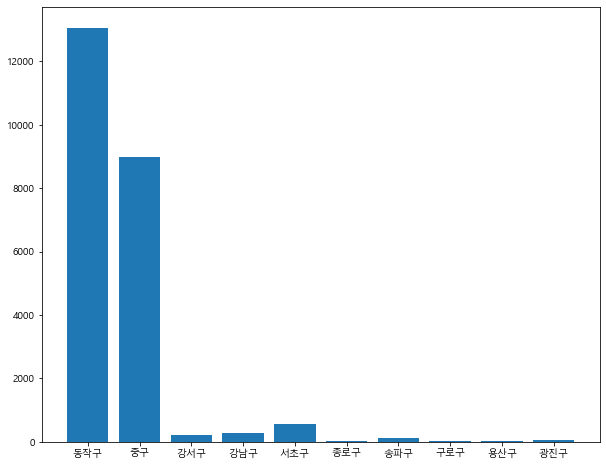

In [81]:
업종코드1 = card5[card5.업종코드 == 1].groupby(["자치구"])["매출발생건수", "매출발생금액","유동인구수"].mean()
업종코드1 = 업종코드1.reset_index().sort_values('매출발생금액',ascending= False).head(10)
업종코드1
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(업종코드1.자치구, 업종코드1.매출발생건수)

1번 업종의 대해 살펴보면, 평균적으로 매출의 대부분이 동작구랑 중구에서 발생하는걸 확인할 수 있습니다.
그리하여 동작구에서 발생하는 1번 업종에 대해 살펴 보겠습니다.

In [82]:
업종코드1_동작구 = card5[(card5.자치구 == '동작구') & (card5.업종코드 == 1)]
업종코드1_동작구['주차'] = 업종코드1_동작구['일시'].dt.week
업종코드1_동작구_주차 = 업종코드1_동작구.groupby('주차')["매출발생금액", "유동인구수","매출발생건수"].mean().reset_index()

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [83]:
업종코드1_동작구_주차.head()


,주차,매출발생금액,유동인구수,매출발생건수
0,1,3.316681e+08,1.753875e+06,47686.000000
1,2,6.076298e+08,2.031502e+06,86704.250000
2,3,7.719664e+08,1.909875e+06,107923.285714
3,4,1.165641e+08,1.832730e+06,16075.716418
4,5,9.840473e+07,1.791825e+06,13804.698795


c:\users\eoghk\anaconda3\envs\section\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

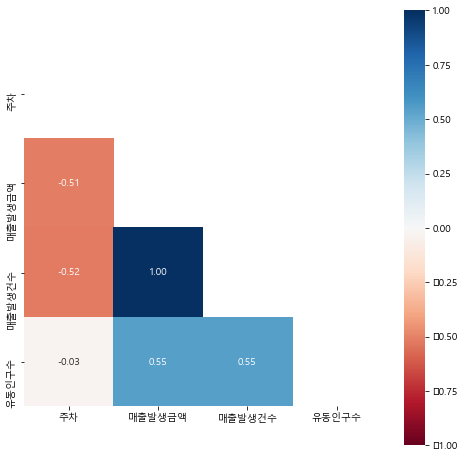

In [84]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = 업종코드1_동작구_주차[['주차', '매출발생금액', '매출발생건수','유동인구수']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
)

동작구에서의 숙박및 유동인구의 상관 관계를 살표보면, 매출발생금액이랑 (매출발생건수, 유동인구수)는 양의 상관관계를 가지고, 주차는 음의 상관관계를 가지고 있습니다.

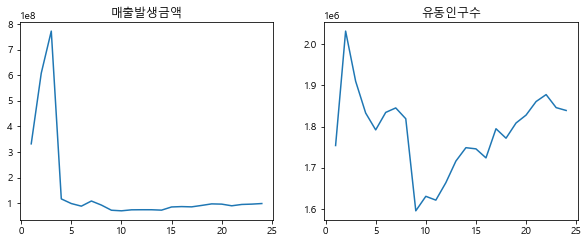

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(221)
plt.title('매출발생금액')
plt.plot(업종코드1_동작구_주차.주차, 업종코드1_동작구_주차.매출발생금액)
plt.subplot(222)
plt.title('유동인구수')
plt.plot(업종코드1_동작구_주차.주차, 업종코드1_동작구_주차.유동인구수)
plt.show()

3주차까지는 매출이랑 유동인구수가 같이 증가했지만, 유동인구가 하락하므로써 매출금액이 하락하는걸 알 수있습니다. 10주차부터 유동인구수는 다시 회복하는 추세를 보이고 있습니다. 그러나 매출은 크게 회복하지 못하는 모습을 보이고 있습니다. 

10주차이후 자세히 살펴보겠습니다.

In [96]:
업종코드1_동작구_10주차이후 = 업종코드1_동작구_주차[업종코드1_동작구_주차.주차 >= 10]

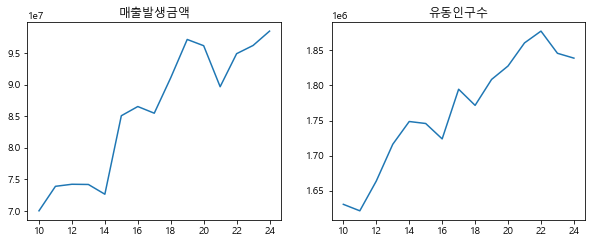

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplot(221)
plt.title('매출발생금액')
plt.plot(업종코드1_동작구_10주차이후.주차, 업종코드1_동작구_10주차이후.매출발생금액)
plt.subplot(222)
plt.title('유동인구수')
plt.plot(업종코드1_동작구_10주차이후.주차, 업종코드1_동작구_10주차이후.유동인구수)
plt.show()

매출발생금액의 단위를 작게하여 살펴본 결과 10주차 이후에 매출발생금액 또한 회복하는 추세를 보이고, 유동인구수와 유사한 형태의 그래프를 가지는걸 알 수 있습니다. 

In [385]:
업종코드1_동작구_10주차이후_cor=업종코드1_동작구_10주차이후.corr(method='pearson')
업종코드1_동작구_10주차이후_cor

,주차,매출발생금액,유동인구수,매출발생건수
주차,1.000000,0.933195,0.946697,0.931584
매출발생금액,0.933195,1.000000,0.860744,0.998268
유동인구수,0.946697,0.860744,1.000000,0.854882
매출발생건수,0.931584,0.998268,0.854882,1.000000


매출발생금액과 유동인구수의 상관관계를 살펴보면 0.55에서 0.86으로 상승하였습니다.

#### 1~6월까지의 매출발생금액이 가장많이 발생한 업종찾기.

In [148]:
for i in range(1,10):
    print(i, card5[card5.업종코드 == i]['매출발생금액'].sum())


1 844300604673
2 404395895446
3 608884997251
4 15445237917947
5 670885829109
6 2726348857084
7 2203559761603
8 3559067710347
9 5706721067973


4번업종(물품판매)가 가장 많은 매출발생금액인걸 알 수 있다.

In [172]:
len(list(업종코드4.업종명.unique()))

46

4번업종에서 46개의 업종을 포함하고 있습니다.

In [176]:
업종코드4['월'] = 업종코드4.일시.apply(lambda d: (d.month))

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
업종코드4 = card5[card5.업종코드 == 4]
업종코드4['월'] = 업종코드4.일시.apply(lambda d: (d.month))
업종코드4_1월 = 업종코드4[업종코드4.월 ==1].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]
업종코드4_2월 = 업종코드4[업종코드4.월 ==2].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]
업종코드4_3월 = 업종코드4[업종코드4.월 ==3].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]
업종코드4_4월 = 업종코드4[업종코드4.월 ==4].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]
업종코드4_5월 = 업종코드4[업종코드4.월 ==5].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]
업종코드4_6월 = 업종코드4[업종코드4.월 ==6].groupby('업종명')["매출발생금액"].sum().reset_index().sort_values("매출발생금액", ascending = False)[:6]

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


46개의 업종에서 1~6월까지의 판매 물품 1등부터 6등까지 금액이랑 시각화하기.

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator

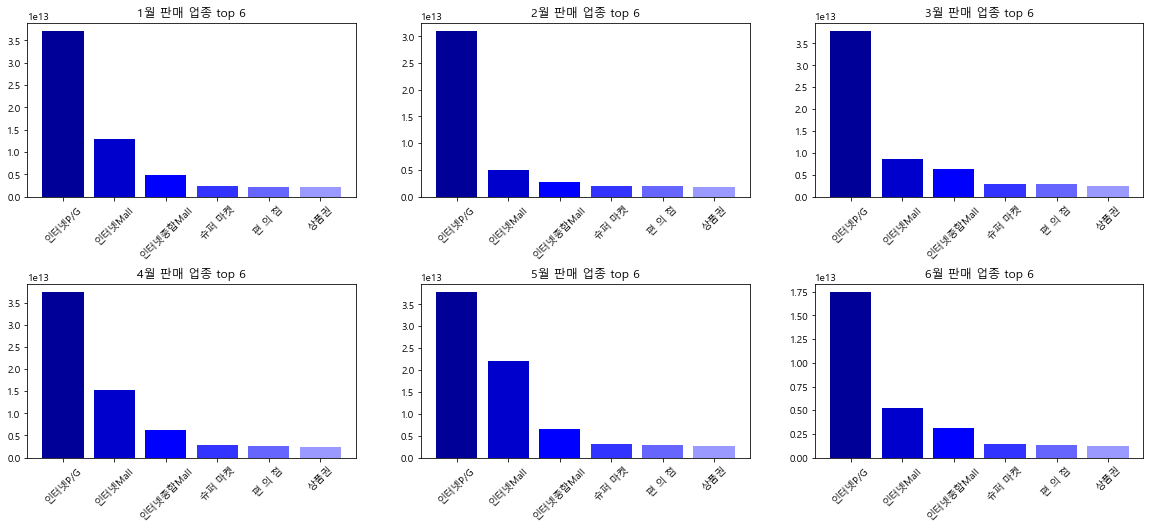

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))
plt.subplots_adjust(hspace = 0.5)
colors = ['#000099','#0000CC','#0000FF','#3333FF','#6666FF','#9999FF'] # 
ax[0, 0].set_title('1월 판매 업종 top 6')
ax[0, 0].bar(업종코드4_1월['업종명'], 업종코드4_1월['매출발생금액'], color=colors)
ax[0, 0].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

ax[0, 1].set_title('2월 판매 업종 top 6')
ax[0, 1].bar(업종코드4_2월['업종명'], 업종코드4_2월['매출발생금액'], color=colors)
ax[0, 1].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

ax[0, 2].set_title('3월 판매 업종 top 6')
ax[0, 2].bar(업종코드4_3월['업종명'], 업종코드4_3월['매출발생금액'], color=colors)
ax[0, 2].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

ax[1, 0].set_title('4월 판매 업종 top 6')
ax[1, 0].bar(업종코드4_4월['업종명'], 업종코드4_4월['매출발생금액'], color=colors)
ax[1, 0].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

ax[1, 1].set_title('5월 판매 업종 top 6')
ax[1, 1].bar(업종코드4_5월['업종명'], 업종코드4_5월['매출발생금액'], color=colors)
ax[1, 1].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

ax[1, 2].set_title('6월 판매 업종 top 6')
ax[1, 2].bar(업종코드4_6월['업종명'], 업종코드4_6월['매출발생금액'], color=colors)
ax[1, 2].set_xticklabels(업종코드4_1월['업종명'],rotation = 45)

plt.show()

1월부터 6월까지 등수의 변함없이 인터넷판매, 슈퍼마켓 , 편의점, 상품권순으로 판매금액이 가장 높은걸 알수 있다.

평균적으로 인터넷판매가 몇번째 주에 가장 많은 매출발생건수를 기록하는지 알아보겠습니다.


In [322]:
업4_인터넷['월'] = 업4_인터넷.일시.apply(lambda d: (d.month))
업4_인터넷['주'] = 업4_인터넷.일시.apply(lambda d: (d.day-1) // 7 + 1)
업4_인터넷 = 업4_인터넷.groupby(['월','주'])[["매출발생건수"]].mean().reset_index()
업4_인터넷.head(6)

,월,주,매출발생건수
0,1,1,8.157802e+05
1,1,2,8.361697e+05
2,1,3,8.658476e+05
3,1,4,7.706267e+05
4,1,5,1.040837e+06
5,2,1,8.719436e+05


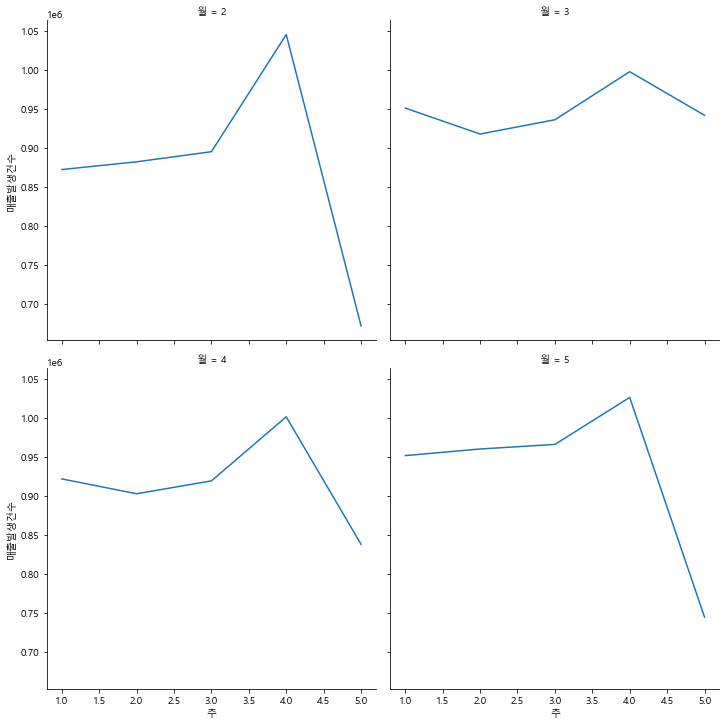

In [386]:
sns.relplot(
    x='주',
    y='매출발생건수',
    data= 업4_인터넷,
    kind = 'line',
    col='월',
    col_order=[2,3,4,5],
    col_wrap = 2
 )


평균적으로 4번째 주에 가장 많은 발생 건수를 기록하는걸 알 수 있었습니다.

##### 이로서 어느 업종이 어디서 가장많이 발생하고, 사람들의 소비 패턴을 확인해 보았습니다. 감사합니다.